<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/nutrition_knwolegde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing dependancies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import os

In [8]:
#importation of dataset
data= pd.read_csv('/content/nutrition_education_dataset.csv')
data.head()

,ID,Gender,Sport,Year_of_Study,Age,Nutrition_Knowledge_Pre,Nutrition_Knowledge_Post,Attitude_Change
0,1,Male,Basketball,1,21,6,9,Positive
1,2,Female,Rugby,3,20,5,5,Negative
2,3,Male,Athletics,2,19,3,5,Positive
3,4,Male,Basketball,1,20,3,6,Positive
4,5,Male,Basketball,4,24,6,7,Neutral


In [9]:
#summary statistics.
data.describe()

,ID,Year_of_Study,Age,Nutrition_Knowledge_Pre,Nutrition_Knowledge_Post
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,47.000000,2.537634,21.408602,4.935484,6.365591
std,26.990739,1.156824,2.541980,1.420398,1.798459
min,1.000000,1.000000,18.000000,3.000000,3.000000
25%,24.000000,1.000000,19.000000,4.000000,5.000000
50%,47.000000,3.000000,21.000000,5.000000,6.000000
75%,70.000000,4.000000,24.000000,6.000000,8.000000
max,93.000000,4.000000,25.000000,7.000000,10.000000


CHECKING DISTRIBUTION  OF THE DATA.

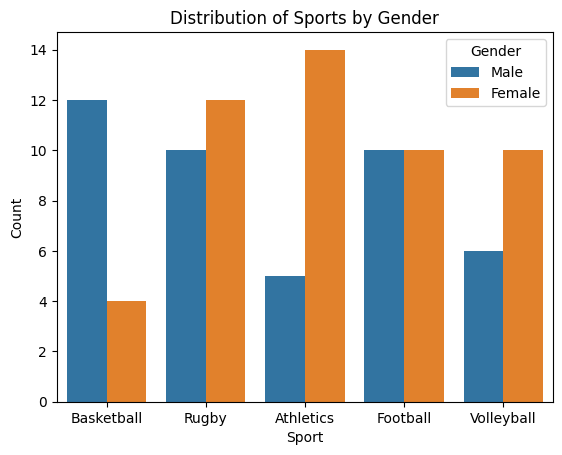

Gender,Female,Male
Sport,,
Athletics,14,5
Basketball,4,12
Football,10,10
Rugby,12,10
Volleyball,10,6


In [10]:
#distribution of sports by gender.
sns.countplot(x=data['Sport'], hue='Gender', data=data)
plt.title('Distribution of Sports by Gender')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.show()
#cross tabs
pd.crosstab(data['Sport'], data['Gender'])

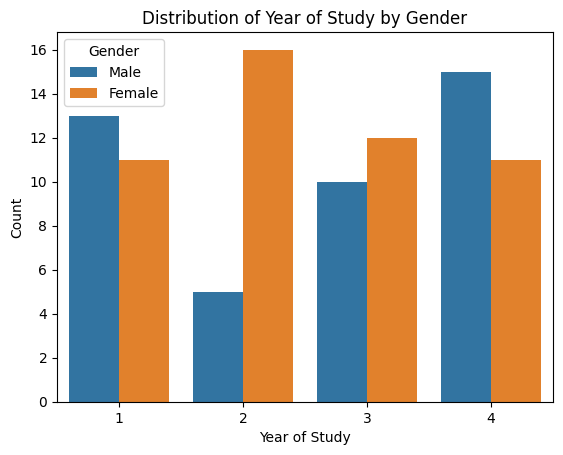

Gender,Female,Male
Year_of_Study,,
1,11,13
2,16,5
3,12,10
4,11,15


In [11]:
#year of study distribution
sns.countplot(x=data['Year_of_Study'], hue='Gender', data=data)
plt.title('Distribution of Year of Study by Gender')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.show()
#crosstabs
pd.crosstab(data['Year_of_Study'], data['Gender'])

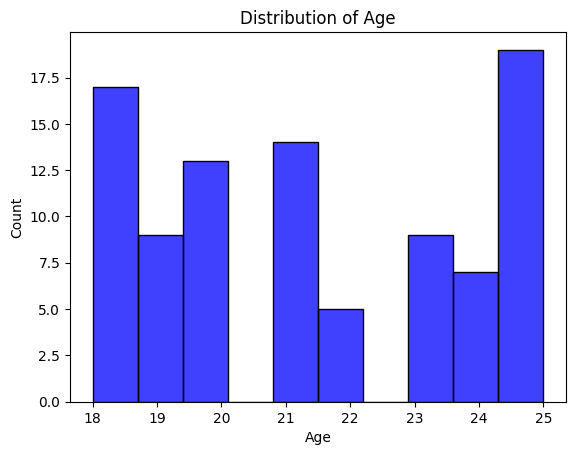

In [12]:
#distribution of age using a histogram and a kde
sns.histplot(data['Age'], kde=False, bins=10, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


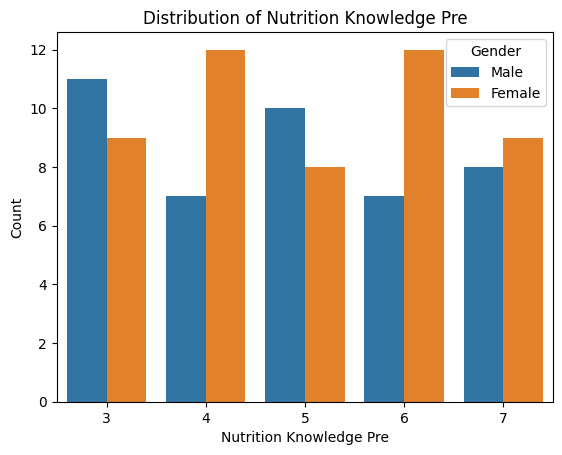

In [13]:
#distribution of Nutrition_Knowledge_Pre
sns.countplot(x=data['Nutrition_Knowledge_Pre'], hue='Gender', data=data)
plt.title('Distribution of Nutrition Knowledge Pre')
plt.xlabel('Nutrition Knowledge Pre')
plt.ylabel('Count')
plt.show()



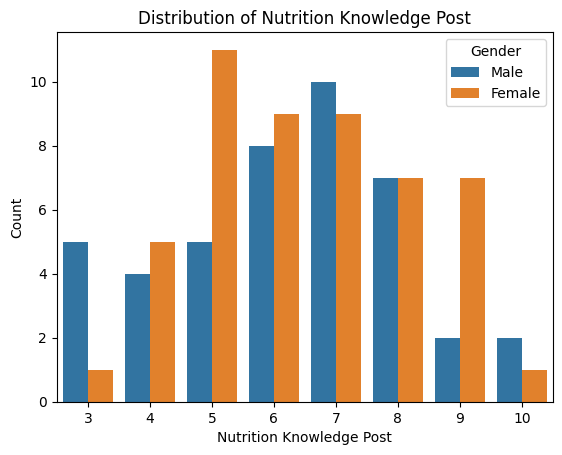

Gender,Female,Male
Nutrition_Knowledge_Post,,
3,1,5
4,5,4
5,11,5
6,9,8
7,9,10
8,7,7
9,7,2
10,1,2


In [14]:
#distribution of Nutrition_Knowledge_Post
sns.countplot(x=data['Nutrition_Knowledge_Post'], hue='Gender', data=data)
plt.title('Distribution of Nutrition Knowledge Post')
plt.xlabel('Nutrition Knowledge Post')
plt.ylabel('Count')
plt.show()
#crosstabs
pd.crosstab(data['Nutrition_Knowledge_Post'], data['Gender'])

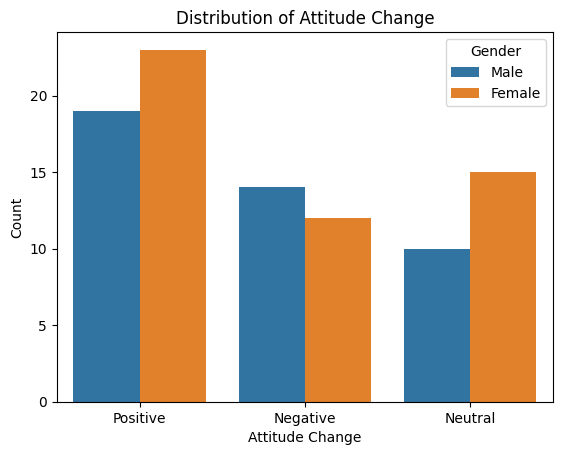

Gender,Female,Male
Attitude_Change,,
Negative,12,14
Neutral,15,10
Positive,23,19


In [15]:
#distribution of attitude change
sns.countplot(x=data['Attitude_Change'],hue="Gender", data=data)
plt.title('Distribution of Attitude Change')
plt.xlabel('Attitude Change')
plt.ylabel('Count')
plt.show()
#crosstabs
pd.crosstab(data['Attitude_Change'], data['Gender'])


PERFOMING THE T-TEST.

In [16]:
#performing t-test
from scipy.stats import ttest_rel
t_stat, p_value = stats.ttest_rel(data['Nutrition_Knowledge_Pre'], data['Nutrition_Knowledge_Post'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')



T-statistic: -11.937475758954308, P-value: 2.145256697512675e-20


In [17]:
#hypothesis testing
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between Nutrition_Knowledge_Pre and Nutrition_Knowledge_Post.")


Reject the null hypothesis. There is a significant difference between Nutrition_Knowledge_Pre and Nutrition_Knowledge_Post.


PERFORMING CHI-SQUARE TEST OF INDIPENDENCE.

In [18]:
#performing chi-square test of independence.
contingency_table = pd.crosstab(data['Attitude_Change'], data['Nutrition_Knowledge_Post'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, P-value: {p}')

print(contingency_table)

Chi-square statistic: 50.927295839388385, P-value: 4.266681256767057e-06
Nutrition_Knowledge_Post  3   4   5   6   7   8   9   10
Attitude_Change                                         
Negative                   6   5   7   4   4   0   0   0
Neutral                    0   4   5   4   4   8   0   0
Positive                   0   0   4   9  11   6   9   3


In [19]:
#HYPOTHESIS TESTING for the chisquare
if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between Attitude_Change and Nutrition_Knowledge_Post.")


Reject the null hypothesis. There is a significant association between Attitude_Change and Nutrition_Knowledge_Post.
